In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz
from scipy.stats import norm

#Qestion 1

In [2]:
#import the data 

df_train = pd.read_excel('Asssignment4_Data.xlsx', sheet_name=['Train'])['Train']
print(df_train)

    House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0          1       4.9176        1.0     3.4720        0.998        1.0   
1          2       5.0208        1.0     3.5310        1.500        2.0   
2          3       4.5429        1.0     2.2750        1.175        1.0   
3          4       4.5573        1.0     4.0500        1.232        1.0   
4          5       5.0597        1.0     4.4550        1.121        1.0   
5          6       3.8910        1.0     4.4550        0.988        1.0   
6          7       5.8980        1.0     5.8500        1.240        1.0   
7          8       5.6039        1.0     9.5200        1.501        0.0   
8          9      16.4202        2.5     9.8000        3.420        2.0   
9         10      14.4598        2.5    12.8000        3.000        2.0   
10        11       5.8282        1.0     6.4350        1.225        2.0   
11        12       5.3003        1.0     4.9883        1.552        1.0   
12        13       6.2712

In [3]:
#import test set
df_test = pd.read_excel('Asssignment4_Data.xlsx', sheet_name=['Test'])['Test']
print(df_test)

   House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0        24       6.0931        1.5     6.7265        1.652        1.0   
1        25       8.3607        1.5     9.1500        1.777        2.0   
2        26       8.1400        1.0     8.0000        1.504        2.0   
3        27       9.1416        1.5     7.3262        1.831        1.5   
4        28      12.0000        1.5     5.0000        1.200        2.0   

   # Rooms  # Bedrooms  Age of home Construction type  
0        6           3           44         Apartment  
1        8           4           48             House  
2        7           3            3             House  
3        8           4           31         Apartment  
4        6           3           30         Apartment  


In [4]:
#define features
features = ['Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home', 'Local Price']
      #  'Construction type']
print(features)

['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home', 'Local Price']


In [5]:
#transform data to array
X_train = df_train[features].to_numpy()
X_test = df_test[features].to_numpy()
np.shape(X_train)

(20, 8)

In [6]:
#define each category to a number
Target = {'Apartment':0,'House':1, 'Condo':2}
for i in range(20):
  df_train['Construction type'].iloc[i]=Target[df_train['Construction type'].iloc[i]]
for i in range(5):
  df_test['Construction type'].iloc[i]=Target[df_test['Construction type'].iloc[i]]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
df_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,0
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,1
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,1
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,0
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,0


In [8]:
df_train

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,0
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,0
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,0
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,0


In [9]:
y_train = df_train['Construction type'].to_numpy()
y_test = df_test['Construction type'].to_numpy()
print(np.shape(X_train), np.shape(y_train))

(20, 8) (20,)


In [10]:
X_train[:,0][y_train == 0]

array([1. , 1. , 1. , 2.5, 1. , 1.5, 1. ])

In [11]:
#creat mean value for each target class
mean = []
for i in range(len(features)):
  mean_feature = []
  for j in range(3):
    mean_feature.append(np.mean(X_train[:,i][y_train == j]))
  mean.append(mean_feature[:])
  
mean

[[1.2857142857142858, 1.0714285714285714, 1.3333333333333333],
 [6.103857142857143, 6.6309, 6.0246666666666675],
 [1.5050000000000001, 1.3917142857142857, 1.5533333333333335],
 [1.2142857142857142, 1.0714285714285714, 1.3333333333333333],
 [6.857142857142857, 6.142857142857143, 6.833333333333333],
 [3.4285714285714284, 3.0, 3.3333333333333335],
 [38.714285714285715, 34.285714285714285, 39.666666666666664],
 [7.332742857142857, 5.760742857142858, 7.415900000000001]]

In [12]:
#create variance for each target class
variance = []
for i in range(len(features)):
  variance_feature = []
  for j in range(3):
    variance_feature.append(np.std(X_train[:,i][y_train == j]))
  variance.append(variance_feature[:])
  
variance

[[0.524890659167824, 0.1749635530559413, 0.5527707983925667],
 [3.0167935877385466, 2.0821446093597133, 2.323053282978149],
 [0.6518753167373563, 0.19712919207298277, 0.8429827334464739],
 [0.6468132241526726, 0.7759128922285868, 0.4714045207910317],
 [1.2453996981544782, 0.6388765649999399, 1.462494064565354],
 [0.9035079029052513, 0.5345224838248488, 0.7453559924999298],
 [13.593215594703176, 11.78030178747903, 12.736648783028533],
 [3.347762921225858, 0.527829731358629, 4.209474116798915]]

In [13]:
#test mean of a value as a test
df_train[df_train['Construction type'] == 0]['Land Area'].mean()

6.103857142857143

In [14]:
#computing the conditional probability for each input based on target value
def normal(x):
  prob_class=[]
  for j in range(3):
    prob = 1
    for i in range(len(features)):
      prob *= norm(mean[i][j],variance[i][j]).pdf(x[i])
    prob *= (np.count_nonzero(y_train == j)/y_train.shape[0])
    prob_class.append(prob)

  return np.argmax(prob_class), prob_class

prob_class=[]
y_pred=[]
for i in range(X_test.shape[0]):
  y_pred.append(normal(X_test[i,:])[0])
  prob_class.append(normal(X_test[i,:])[1])

print(y_pred)
prob_class

[1, 0, 0, 0, 2]


[[3.332970241404607e-06, 2.2383257200154037e-05, 3.149377483509885e-06],
 [6.458538667459791e-07, 2.2866649189072158e-14, 3.40166241293818e-07],
 [6.07588789212998e-08, 2.7051935317846344e-10, 1.9342713608903886e-08],
 [1.7615880887158328e-06, 1.931992729271351e-17, 1.6683949961126978e-06],
 [5.263002155189463e-07, 8.811131914126896e-36, 6.010079401265223e-07]]

In [15]:
y_test

array([0, 1, 1, 0, 0], dtype=object)

### the algorithm works only with 20% accuracy based on the small given dataset

# DecisionTree, Question 2

In [16]:
from sklearn.tree import DecisionTreeClassifier


In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [34]:
df_train = pd.read_excel('Asssignment4_Data.xlsx', sheet_name=['Train'])['Train']
df_test = pd.read_excel('Asssignment4_Data.xlsx', sheet_name=['Test'])['Test']

def func(row):
  if row['Construction type'] == 'Condo':
    return 2
  if row['Construction type'] == 'Apartment':
    return 0
  if row['Construction type'] == 'House':
    return 1

df_train['ConstructionInt'] = df_train.apply(lambda row: func(row), axis=1)
df_test['ConstructionInt'] = df_test.apply(lambda row: func(row), axis=1) 
df_train, df_test

(    House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
 0          1       4.9176        1.0     3.4720        0.998        1.0   
 1          2       5.0208        1.0     3.5310        1.500        2.0   
 2          3       4.5429        1.0     2.2750        1.175        1.0   
 3          4       4.5573        1.0     4.0500        1.232        1.0   
 4          5       5.0597        1.0     4.4550        1.121        1.0   
 5          6       3.8910        1.0     4.4550        0.988        1.0   
 6          7       5.8980        1.0     5.8500        1.240        1.0   
 7          8       5.6039        1.0     9.5200        1.501        0.0   
 8          9      16.4202        2.5     9.8000        3.420        2.0   
 9         10      14.4598        2.5    12.8000        3.000        2.0   
 10        11       5.8282        1.0     6.4350        1.225        2.0   
 11        12       5.3003        1.0     4.9883        1.552        1.0   
 12        1

In [35]:
features = ['Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home', 'Local Price']
X_train = df_train[features].to_numpy()
# y_train = df_train['Construction type']
y_train = df_train['ConstructionInt']

X_test = df_test[features].to_numpy()
# y_test = df_test['Construction type']
y_test = df_test['ConstructionInt']
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))



(20, 8) (20,)
(5, 8) (5,)


In [45]:
clf = DecisionTreeClassifier(random_state=0, #max_depth=4
                             )
model = clf.fit(X_train, y_train)

text_representation = tree.export_text(clf, feature_names=features, show_weights=True)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
  fout.write(text_representation)



|--- Age of home <= 36.00
|   |--- Local Price <= 8.41
|   |   |--- Age of home <= 19.50
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- Age of home >  19.50
|   |   |   |--- Living area <= 1.17
|   |   |   |   |--- Age of home <= 31.00
|   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |   |   |   |--- Age of home >  31.00
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |   |--- Living area >  1.17
|   |   |   |   |--- weights: [0.00, 5.00, 0.00] class: 1
|   |--- Local Price >  8.41
|   |   |--- weights: [2.00, 0.00, 0.00] class: 0
|--- Age of home >  36.00
|   |--- Local Price <= 4.55
|   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |--- Local Price >  4.55
|   |   |--- Land Area <= 5.50
|   |   |   |--- Age of home <= 58.00
|   |   |   |   |--- weights: [5.00, 0.00, 0.00] class: 0
|   |   |   |--- Age of home >  58.00
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |   |--- Land Area >  5.50
|   |   |   |---

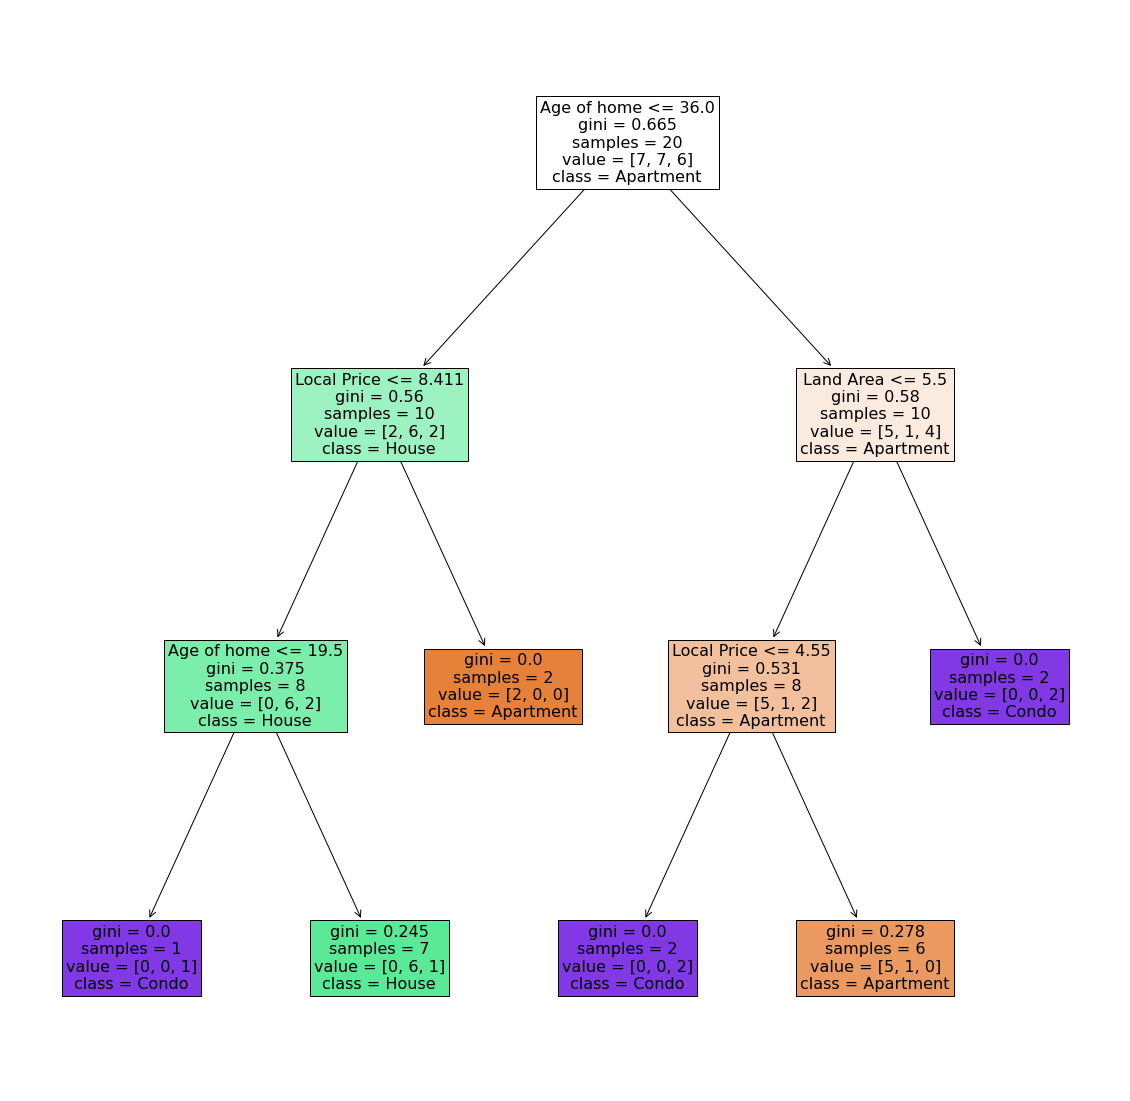

In [63]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, feature_names=features, class_names=['Apartment','House','Condo'], filled=True, fontsize=16)


## 2.a 2.b

In [46]:
from sklearn.metrics import accuracy_score


In [47]:
res_pred = clf.predict(X_test)
score_test = accuracy_score(y_test, res_pred)

In [48]:
print(score_test)

0.4


## 1) a: by using the default parameters, the accuracy on the training set is 40%. Based on the small dataset, we are not surprised that we could not get a high accuracy.

In [49]:
res_pred = clf.predict(X_train)
score_train = accuracy_score(y_train, res_pred)
print(score_train)

1.0


## 1) b: By using the default parameters, the accuracy on the training dataset is 100%. It is overfitted. There are several reasons to explain why this is happened. For instance, small number of data in the training set leads to overfitting. Plus, when we are using a complex algorithm on a small dataset, overfitting could happen. In this case, because we cannot add more data to our dataset, we can use simpler model to predict our target.

## Question 2, part 2

In [50]:
#trying different depth
clf = DecisionTreeClassifier(random_state=0, max_depth=4
                             )
model = clf.fit(X_train, y_train)

text_representation = tree.export_text(clf, feature_names=features, show_weights=True)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
  fout.write(text_representation)

|--- Age of home <= 36.00
|   |--- Local Price <= 8.41
|   |   |--- Age of home <= 19.50
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- Age of home >  19.50
|   |   |   |--- Living area <= 1.17
|   |   |   |   |--- weights: [0.00, 1.00, 1.00] class: 1
|   |   |   |--- Living area >  1.17
|   |   |   |   |--- weights: [0.00, 5.00, 0.00] class: 1
|   |--- Local Price >  8.41
|   |   |--- weights: [2.00, 0.00, 0.00] class: 0
|--- Age of home >  36.00
|   |--- Land Area <= 5.50
|   |   |--- Local Price <= 4.55
|   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |--- Local Price >  4.55
|   |   |   |--- Age of home <= 58.00
|   |   |   |   |--- weights: [5.00, 0.00, 0.00] class: 0
|   |   |   |--- Age of home >  58.00
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |--- Land Area >  5.50
|   |   |--- weights: [0.00, 0.00, 2.00] class: 2



In [61]:
#depth of 4
res_pred = clf.predict(X_test)
score_test = accuracy_score(y_test, res_pred)

print('score_test =',score_test)

res_pred = clf.predict(X_train)
score_train = accuracy_score(y_train, res_pred)
print('score_train = ',score_train)

score_test = 0.4
score_train =  0.9


In [60]:
#model with depth 3
clf = DecisionTreeClassifier(random_state=0, max_depth=3
                             )
model = clf.fit(X_train, y_train)

text_representation = tree.export_text(clf, feature_names=features, show_weights=True)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
  fout.write(text_representation)
# accuracy of depth 3
res_pred = clf.predict(X_test)
score_test = accuracy_score(y_test, res_pred)

print('score_test =',score_test)

res_pred = clf.predict(X_train)
score_train = accuracy_score(y_train, res_pred)
print('score_train = ',score_train)

|--- Age of home <= 36.00
|   |--- Local Price <= 8.41
|   |   |--- Age of home <= 19.50
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- Age of home >  19.50
|   |   |   |--- weights: [0.00, 6.00, 1.00] class: 1
|   |--- Local Price >  8.41
|   |   |--- weights: [2.00, 0.00, 0.00] class: 0
|--- Age of home >  36.00
|   |--- Land Area <= 5.50
|   |   |--- Local Price <= 4.55
|   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |--- Local Price >  4.55
|   |   |   |--- weights: [5.00, 1.00, 0.00] class: 0
|   |--- Land Area >  5.50
|   |   |--- weights: [0.00, 0.00, 2.00] class: 2

score_test = 0.4
score_train =  0.9


In [57]:
#model with depth 2
clf = DecisionTreeClassifier(random_state=0, max_depth=2
                             )
model = clf.fit(X_train, y_train)

text_representation = tree.export_text(clf, feature_names=features, show_weights=True)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
  fout.write(text_representation)
# accuracy of depth 2
res_pred = clf.predict(X_test)
score_test = accuracy_score(y_test, res_pred)

print('score_test =',score_test)

res_pred = clf.predict(X_train)
score_train = accuracy_score(y_train, res_pred)
print('score_train = ', score_train)

|--- Age of home <= 36.00
|   |--- Local Price <= 8.41
|   |   |--- weights: [0.00, 6.00, 2.00] class: 1
|   |--- Local Price >  8.41
|   |   |--- weights: [2.00, 0.00, 0.00] class: 0
|--- Age of home >  36.00
|   |--- Land Area <= 5.50
|   |   |--- weights: [5.00, 1.00, 2.00] class: 0
|   |--- Land Area >  5.50
|   |   |--- weights: [0.00, 0.00, 2.00] class: 2

score_test = 0.6
score_train =  0.75


In [54]:
#model with depth 1
clf = DecisionTreeClassifier(random_state=0, max_depth=1
                             )
model = clf.fit(X_train, y_train)

text_representation = tree.export_text(clf, feature_names=features, show_weights=True)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
  fout.write(text_representation)
# accuracy of depth 1
res_pred = clf.predict(X_test)
score_test = accuracy_score(y_test, res_pred)

print(score_test)

res_pred = clf.predict(X_train)
score_train = accuracy_score(y_train, res_pred)
print(score_train)

|--- Age of home <= 36.00
|   |--- weights: [2.00, 6.00, 2.00] class: 1
|--- Age of home >  36.00
|   |--- weights: [5.00, 1.00, 4.00] class: 0

0.4
0.55


### 2) 2: We saw that by using default parameters we received 100% accuracy on the training dataset which means the model is overfitted. By trying different depth like 4,3,2, and 1, we achieved the different result which we can compare them together. By the result showed above, we can infer that the decision tree with the depth of 2 works better in this case. As we can see that by reducing the complexity of our model, we prevent overfitting and also it leads toward the better accuracy on our test dataset. 

## 2) 3: restricting the depth has a significant influence because we have a small dataset which means if we use complex model we cannot reach to best accuracy. In this case we need to try simpler model which means reducing the depth of our tree. 


# 2) 4: Visualizing new input:

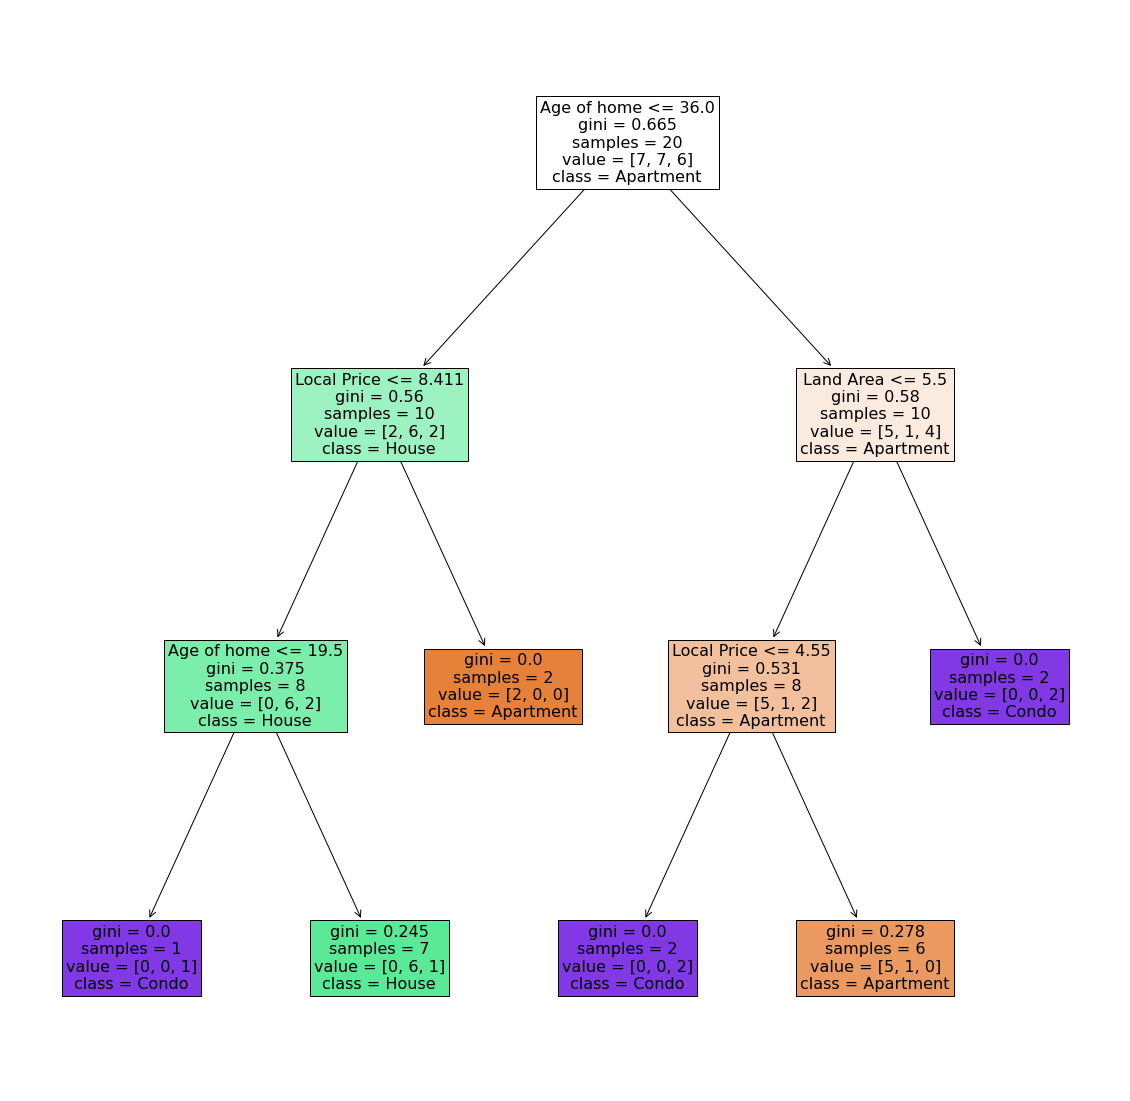

In [64]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, feature_names=features, class_names=['Apartment','House','Condo'], filled=True, fontsize=16)


### 2) 4: Continued: Based on the input data provided in the example, and the decision tree we have modeled here, the first feature will be age of home which we are interested in. In the example, age of home is 23 which means less than 36. So we are going to the next feature called local price. In the example local price is 9.03 which is greater than 8.41. Now we stope based on the decision tree. The class for this input data will be Apartment.

#Q3:

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:

# Counter to help with label voting
from collections import Counter
import numpy as np

features = ['Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home', 'Local Price']
X_train = df_train[features].to_numpy()
y_train = df_train['Construction type']
# y_train = df_train['ConstructionInt']

X_test = df_test[features].to_numpy()
y_test = df_test['Construction type']
# y_test = df_test['ConstructionInt']

def euclidean_dist(a, b):
  return np.linalg.norm(a-b)

k = 3
def knn_predict(X_train, X_test, y_train, y_test, k):
    
  # Make predictions on the test data
  # Need output of 1 prediction per test data point
  y_hat_test = []
  num_train, num_features = np.shape(X_train)
  num_test, num_features = np.shape(X_test)    

  for idx_test in range(num_test):
    test_point = X_test[idx_test, :]
    distances = []

    for idx in range(num_train):
      train_point = X_train[idx, :]
      distance = euclidean_dist(test_point, train_point)
      distances.append(distance)
    
    # Store distances in a dataframe
    df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                            index=range(num_train))  
    
    # Sort distances, and only consider the k closest points
    df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

    # Create counter object to track the labels of k closest neighbors
    counter = Counter(y_train[df_nn.index])    

    # Get most common label of all the nearest neighbors
    prediction = counter.most_common()[0][0]
    
    # Append prediction to output list
    y_hat_test.append(prediction)
    
  return y_hat_test


# Make predictions on test dataset
list_acc = []
for k in range(1, 6):
  y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=k)
  
  list_acc.append(accuracy_score(y_test, y_hat_test))



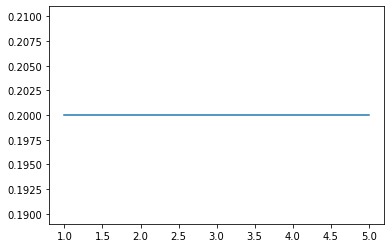

In [71]:
k = [i for i in range(1, 6)]
plt.figure(); plt.plot(k, list_acc)

Text(0, 0.5, 'Testing Accuracy')

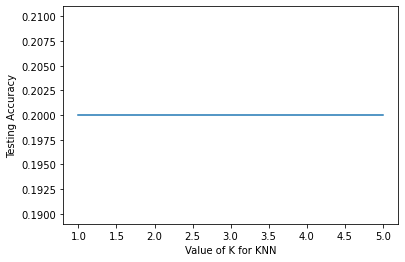

In [72]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k, list_acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Based on the plot above, there is no difference between choosing different number of k in this case. Again, these results may happen because of the small number of samples in the dataset.